## Rob Rutjes - RL Reinforcement Learning - Exercise - Version 1.0

##### Import
Globally introducing the library we are going to use in this notebook.
- Gymnasium for the Box2D frozen lake environment. 
- Numpy for the random number generator.
- Matplotlib for the plotting of the outcome of each episode.

In [1]:
import matplotlib.pyplot as plt
import gymnasium as gym
import numpy as np

##### Parameters
I predefined the parameters for the training and testing of the frozen lake environment.
- Episodes training: 1000
- Episodes testing: 100

In [2]:
# Parameters training & testing
episodes_training = 1000
episodes_testing  = 100

##### Environment
I created the environment for the frozen lake environment. 
The environment is a 4x4 grid with a start and end point. 
The goal is to reach the end point without falling into the holes. 
The environment is not slippery, so the agent will always go in the direction it is told to go.
The render mode is set to ansi, so the environment is in letters instead of a human window application.

In [3]:
env = gym.make('FrozenLake-v1', map_name="4x4", is_slippery=False, render_mode='ansi')

##### Frozen Lake Training
I created the training function for the frozen lake environment.
The function takes the environment and the number of episodes as input.
The function returns the Q-table and the outcome of each episode.
The function is based on the Q-learning algorithm. 

I start with creating a Q-table with zeros for each state-action pair.
The width and height of the Q-table is based on the observation space and action space of the environment.

I then set the hyperparameters for the learning rate, discount factor, epsilon and epsilon decay rate.
- Learning_rate_a: The learning rate (Alpha) of the agent.
- Discount_factor_g: The discount factor (Gamma) of the agent.
- Epsilon: The epsilon value of the agent.
- Epsilon_decay_rate: The epsilon decay rate of the agent.

The values for the hyperparameters are based on the following source:
- [https://towardsdatascience.com/q-learning-for-beginners](https://towardsdatascience.com/q-learning-for-beginners-2837b777741)

For the agent, I need a random number generator. I used the default numpy random number generator.

To store the list of episode outcomes, I created an empty list.

I then start the training loop for the number of episodes.
In this case, 1000 episodes.

For each episode:
- I reset the environment and get the initial state.
- Done is set to false.
- The step count is set to 0.

The default outcome of the episode is failure.

Then the agent starts to take action until the episode is done, or he falls in a hole.
- If the random number is smaller than epsilon, the agent takes a random action.
- If the random number is bigger than epsilon, the agent takes the action with the highest Q-value.

The agent then takes the action and gets the new state, reward and done value.

If the episode is done and the reward is 0, the reward is set to -5.
This is because the agent was not able to reach the end point. Because he fell in a hole.

The Q-table is then updated with the new Q-value.
I used the Q-learning algorithm for this. Which I collected from the following source:
- ChatGPT ;) (I don't know how math works...) 
This Q table looks nice when printed and tested.

The state is then set to the new state.

The step count is then increased by 1.

If the reward is 1, the outcome of the episode is set to success.
This means that the agent was successful in reaching the end point.  

The epsilon value is then updated. With the decay rate, the epsilon value will decrease over time.
This means that the agent will take less random actions over time. And starts to take more actions with the highest Q-value.

The outcome of the episode is then printed to the console. 
- The episode number.
- The outcome of the episode (success or failure).
- The number of steps taken.

The Q-table and the episode outcomes are then returned.

In [4]:
def frozen_lake_training(env, episodes_training):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    
    learning_rate_a = 0.5       # alpha
    discount_factor_g = 0.9     # gamma
    epsilon = 1                 # epsilon
    epsilon_decay_rate = 0.001  # epsilon decay rate
    
    rng = np.random.default_rng() 

    episode_outcomes = []
    
    for episode in range(episodes_training):
        state = env.reset()  # Reset the environment and get the initial state
        done = False         # Whether the episode is done
        step_count = 0       # Initialize the step count for this episode
        
        episode_outcomes.append("Failure")
        
        state, _ = state
        
        while not done:           
            if rng.random() < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state])
            
            new_state, reward, done, _, _ = env.step(action)
            
            if done and reward == 0:
                reward = -5
            
            q_table[state, action] = q_table[state, action] + learning_rate_a * (reward + discount_factor_g * np.max(q_table[new_state]) - q_table[state, action])
            
            state = new_state
            
            step_count += 1
        
            if reward == 1:
                episode_outcomes[-1] = "Success"
                
        epsilon = max(epsilon - epsilon_decay_rate, 0)
        
        print(f"Episode {episode}: Outcome = {episode_outcomes[-1]}, Steps Taken = {step_count}")
    
    return q_table, episode_outcomes

##### Frozen Lake Training
I start the training of the frozen lake environment.
The function takes the environment and the number of episodes as input.
Which is 1000 episodes in this case. Already set at the beginning of this notebook.

During the training, the outcome of each episode is printed to the console.

The function returns the Q-table and the outcome of each episode.

The Q-table is printed to the console.
This looks good, 0. 0. 0. 0. are probably tiles that are holes. 


In [5]:
q_table, episode_outcomes = frozen_lake_training(env, episodes_training)

print()
print("--------------------------------------------------")
print(q_table)

Episode 0: Outcome = Failure, Steps Taken = 9
Episode 1: Outcome = Failure, Steps Taken = 3
Episode 2: Outcome = Failure, Steps Taken = 3
Episode 3: Outcome = Failure, Steps Taken = 4
Episode 4: Outcome = Failure, Steps Taken = 3
Episode 5: Outcome = Failure, Steps Taken = 4
Episode 6: Outcome = Failure, Steps Taken = 11
Episode 7: Outcome = Failure, Steps Taken = 18
Episode 8: Outcome = Failure, Steps Taken = 7
Episode 9: Outcome = Failure, Steps Taken = 10
Episode 10: Outcome = Failure, Steps Taken = 15
Episode 11: Outcome = Failure, Steps Taken = 2
Episode 12: Outcome = Failure, Steps Taken = 6
Episode 13: Outcome = Failure, Steps Taken = 19
Episode 14: Outcome = Failure, Steps Taken = 13
Episode 15: Outcome = Failure, Steps Taken = 5
Episode 16: Outcome = Failure, Steps Taken = 23
Episode 17: Outcome = Failure, Steps Taken = 10
Episode 18: Outcome = Failure, Steps Taken = 6
Episode 19: Outcome = Failure, Steps Taken = 7
Episode 20: Outcome = Failure, Steps Taken = 15
Episode 21: Ou

##### Plotting Training Results
In the source I found for the hyperparameters, they plotted the outcome of each episode.
I've done the same thing here. And recreated their function with a little change for the X value of the plot.

In [6]:
def plot_outcome_success_failure_runs(episode_outcomes):
     plt.rcParams['figure.dpi'] = 100
     plt.rcParams.update({'font.size': 10})
     plt.figure(figsize=(8, 3))
     plt.xlabel("Episode")
     plt.ylabel("Outcome")
     ax = plt.gca()
     ax.set_facecolor('#efeeea')
     plt.bar(range(len(episode_outcomes)), episode_outcomes, color="#07f547", width=1.0)
     plt.show()

##### Plotting Training Results Observations
The plot shows that after around 600 episodes, the agent starts to reach the end point consistently.
After 900 episodes, the agent is able to reach the end point every time.

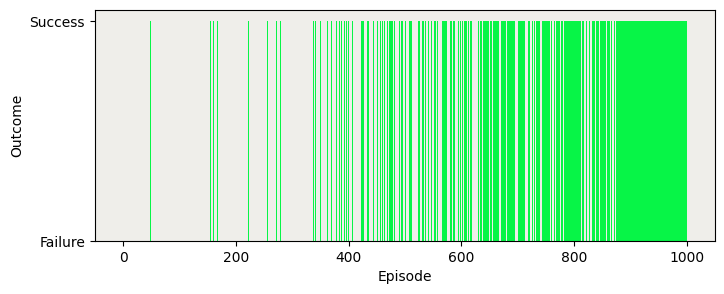

In [7]:
plot_outcome_success_failure_runs(episode_outcomes)

##### Frozen Lake Testing
I want to test if my Q-table is working correctly.
I created a function for testing the frozen lake environment.
The function takes the environment, the number of episodes and the Q-table as input.
The function returns the success rate of the agent.

The agent is using the Q-table to take the action with the highest Q-value.
The agent is not learning anymore, so the Q-table is not updated.

When the reward is 1 the agent reached the end point.
When the reward is 0 the agent fell in a hole.

This is stored in the outcome variable.

I print the episode number, the outcome and the number of steps taken to the console. For the current episode.

The success rate is then printed to the console.
This is calculated by dividing the number of successes by the number of episodes and multiplying it by 100.


In [8]:
def frozen_lake_testing(env, episodes_testing, q_table):   
    episode_success = 0
    
    for episode in range(episodes_testing):
        state = env.reset()
        done = False
        step_count = 0 
        outcome = "Failure"
        
        state, _, = state
        
        while not done:
            action = np.argmax(q_table[state])
            new_state, reward, done, _, _ = env.step(action)
            state = new_state
            
            step_count += 1
            
            if reward == 1:
                outcome = "Success"
                episode_success += 1
            
        env.render()
        
        print(f"Episode {episode}: Outcome = {outcome}, Steps Taken = {step_count}")
        
    print()
    print("----------------------------------------------")
    print (f"Success rate = {episode_success/episodes_testing*100}%")

##### Frozen Lake Testing Observations
The agent is able to reach the end point every time.
This results in a success rate of 100%.
Also, the agent has found the shortest path to the end point. With this Q-Table. 
This is because every episode takes 6 steps to reach the end point.

I'm happy with the results of the Q-Table and exercise.

In [9]:
frozen_lake_testing(env, episodes_testing, q_table)

Episode 0: Outcome = Success, Steps Taken = 6
Episode 1: Outcome = Success, Steps Taken = 6
Episode 2: Outcome = Success, Steps Taken = 6
Episode 3: Outcome = Success, Steps Taken = 6
Episode 4: Outcome = Success, Steps Taken = 6
Episode 5: Outcome = Success, Steps Taken = 6
Episode 6: Outcome = Success, Steps Taken = 6
Episode 7: Outcome = Success, Steps Taken = 6
Episode 8: Outcome = Success, Steps Taken = 6
Episode 9: Outcome = Success, Steps Taken = 6
Episode 10: Outcome = Success, Steps Taken = 6
Episode 11: Outcome = Success, Steps Taken = 6
Episode 12: Outcome = Success, Steps Taken = 6
Episode 13: Outcome = Success, Steps Taken = 6
Episode 14: Outcome = Success, Steps Taken = 6
Episode 15: Outcome = Success, Steps Taken = 6
Episode 16: Outcome = Success, Steps Taken = 6
Episode 17: Outcome = Success, Steps Taken = 6
Episode 18: Outcome = Success, Steps Taken = 6
Episode 19: Outcome = Success, Steps Taken = 6
Episode 20: Outcome = Success, Steps Taken = 6
Episode 21: Outcome = S